In [1]:
# Jupyter notebook setup

import sys
# Add our code
sys.path.append("../")

# Make sure imports are updated constantly
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader

from src.preprocess.pipeline import Pipeline
from src.preprocess.augmentation import AugmentedCollate
from src.data.dataset import APTOSDataset

In [3]:
DATA_FRAME = "../data/aptos2019-blindness-detection/train.csv"
DATA_DIRECTORY = "../data/aptos2019-blindness-detection/train_images"

# Pipeline to debug
PIPELINE_STAGES = [
    # Required for the augmentation algorithms
    (
        "eight_bit_normalization",
        {}
    )
]

AUGMENTATION_STAGES = [
    ("rotate", {"limit": 10, "p": 0.2}),
    ("grid_distort", {"p": 0.2}),
    ("brightness_contrast", {"p": 0.2, "contrast_limit": 0.3, "brightness_limit": 0.3}),
]

In [4]:
df = pd.read_csv(DATA_FRAME)

pipeline = Pipeline(PIPELINE_STAGES, debug=False)

dataset = APTOSDataset(df, DATA_DIRECTORY, pipeline)

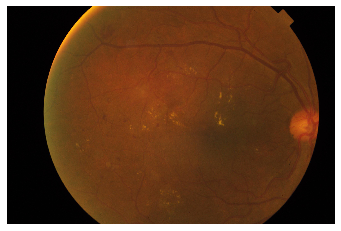

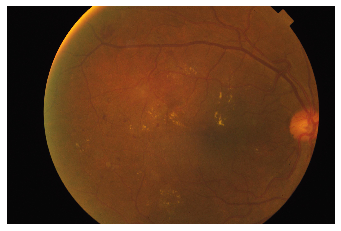

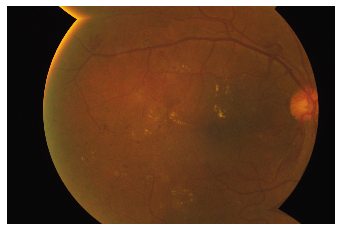

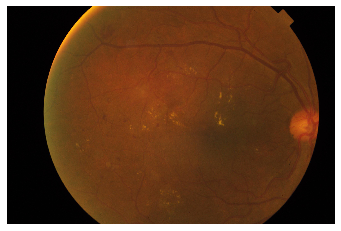

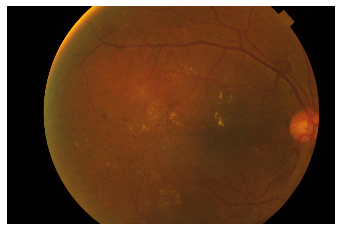

In [5]:
augmentation = AugmentedCollate(AUGMENTATION_STAGES)

for _ in range(5):
    # Reload data loader so we get the same image
    dataset_loader = DataLoader(
        dataset,
        collate_fn=augmentation
    )
    for augmented_image, _, _ in dataset_loader:
        augmented_image = np.array(np.squeeze(augmented_image))
        
        plt.axis('off')
        plt.imshow(augmented_image)
        plt.show()
        break